In [3]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
from PIL import Image as Img
import cv2 as cv

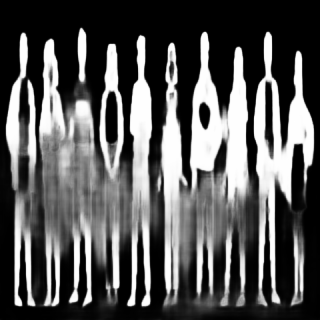

In [5]:
output = load_img('pred.png')
display(output)

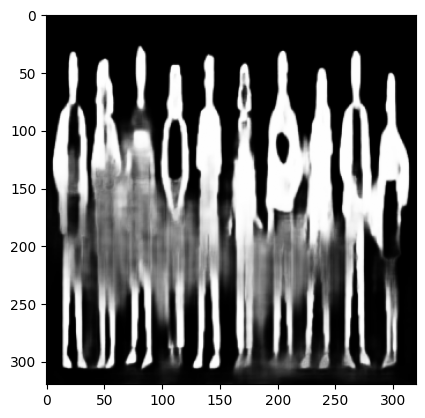

In [6]:
# convert output to numpy array and rescale(255 for RBG images)
RESCALE = 255
out_img = img_to_array(output)
out_img /= RESCALE
import matplotlib.pyplot as plt
plt.imshow(out_img)

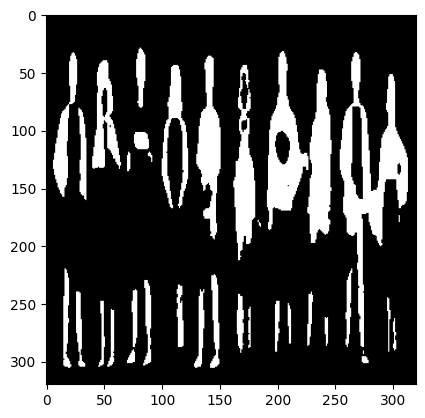

In [7]:
# define the cutoff threshold below which, background will be removed.
THRESHOLD = 0.9

# refine the output
out_img[out_img > THRESHOLD] = 1
out_img[out_img <= THRESHOLD] = 0
plt.imshow(out_img)

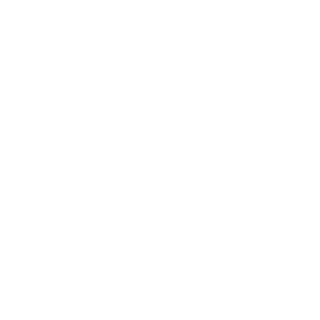

In [8]:
# convert the rbg image to an rgba image and set the zero values to transparent
shape = out_img.shape

a_layer_init = np.ones(shape = (shape[0],shape[1],1))
mul_layer = np.expand_dims(out_img[:,:,0],axis=2)
a_layer = mul_layer*a_layer_init
rgba_out = np.append(out_img,a_layer,axis=2)
display(Img.fromarray((rgba_out*RESCALE).astype('uint8'), 'RGBA'))

In [11]:
shape[1]

320

In [12]:
shape[0]

320

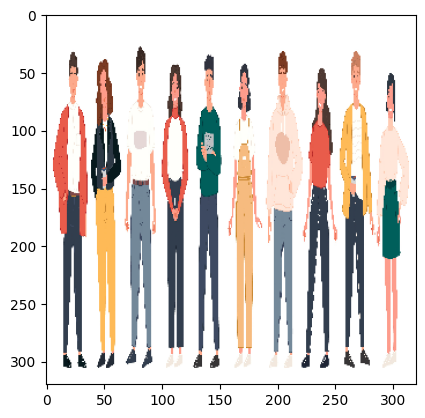

In [13]:
# load and convert input to numpy array and rescale(255 for RBG images)
input = load_img('/home/kailash/SOD/Different_people_01.jpg')
inp_img = img_to_array(input)
inp_img= cv.resize(inp_img, (320, 320))

inp_img /= RESCALE
plt.imshow(inp_img)

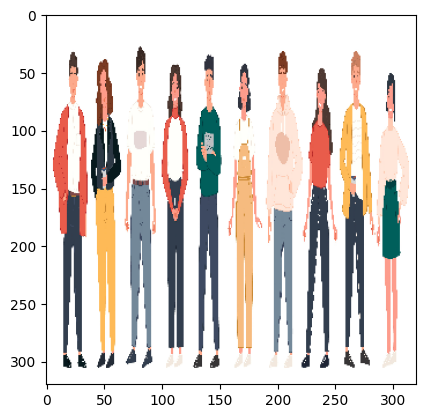

In [14]:
# since the output image is rgba, convert this also to rgba, but with no transparency
a_layer = np.ones(shape = (shape[0],shape[1],1))
rgba_inp = np.append(inp_img,a_layer,axis=2)
plt.imshow(rgba_inp)

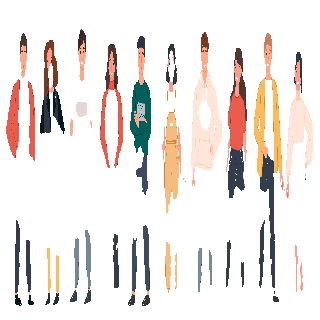

In [15]:
# simply multiply the 2 rgba images to remove the backgound
rem_back = (rgba_inp*rgba_out)
rem_back_scaled = Img.fromarray((rem_back*RESCALE).astype('uint8'), 'RGBA')
display(rem_back_scaled)
# --same, but using cv2--
#rem_back_cv = rem_back[:,:,[2,1,0,3]]
#from google.colab.patches import cv2_imshow
#cv2_imshow(rem_back_cv*RESCALE)